# ANALISI DATASET **GLASGOW NORM** 



## Il Dataset
Il **Glasgow Norms** è un dataset composto da un insieme di valutazioni normative per 5.553 parole inglesi su nove dimensioni psicolinguistiche + altri due valori (la lunghezza in termini di caratteri e la frequenza delle parole): 

un insieme di valutazioni normative per 5.553 parole inglesi su nove dimensioni psicolinguistiche:
1. *eccitazione* (**arousal**): misura l'attivazione interna (eccitazione o calma) di una parola
2. *valenza* (**valence**): misura un valore (positivo o negativo)
3. dominanza (**dominance**): misura il grado di controllo (dominante o controllato) di una parola
4. *concretezza* (**concreteness**): concretezza di una parola per i nostri sensi
5. *imageability* (**imageability**): grado di sforzo nel generare un'immagine mentale per rappresentare quella parola
6. *familiarità* (Familiarity): quanta familiarità il soggetto ha con quella parola
7. *età di acquisizione* (**aoa:** - age of acquisition): a che età il soggetto ha acquisito quella parola
8. *dimensione semantica* (**semsize**): misura della dimensione (grande, piccola) espressa in termini concreti o astratti
9. *associazione di genere* (**gender**): misura se una parola è legata maggiormente alla sfera maschile o femminile.
10. *Polisemia*: variabile binaria e cataegorica che assegna 0 se la parola non è polisemica e 1 se è polisemica [VARIABILE TARGET]
11. *lunghezza* (**length**): lunghezza in caratteri 
12. *frequenza* (**web_corpus_freq**): frequanza della parola all'interno del google Newspaper Corpus

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import seaborn as sns
import nltk

from nltk import *

# Data semantic

- Analisi del dataset (apertura, analisi della tipologia di attributi ecc.)
- Analisi delle variabili e della loro relazione con la variabile target

In [2]:
df = pd.read_csv('words_glasgow.csv')

In [3]:
df.head(10)

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0
5,abdomen,7,4.714,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,1490684.0
6,abdominal,9,3.875,5.212,4.667,5.735,5.030,4.807,5.706,3.788,4.242,0,3090148.0
7,abduct,6,4.677,2.177,3.065,4.441,4.265,4.364,5.030,4.438,5.000,0,126225.0
8,abducted,8,5.344,1.969,2.871,4.813,4.212,5.406,5.290,5.161,4.546,0,837949.0
9,abduction,9,5.324,1.618,2.886,4.912,4.800,4.441,5.114,5.059,4.686,0,1188510.0


In [4]:
df.tail(10)

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
4672,youth,5,5.548,6.563,5.219,3.677,4.355,5.929,4.156,4.094,3.742,0,51426255.0
4673,youthful,8,6.194,7.500,5.129,3.156,4.161,4.967,5.167,4.156,2.897,0,1381263.0
4674,zeal,4,5.913,6.429,6.174,2.947,2.826,2.688,5.917,4.474,3.909,0,1084831.0
4675,zebra,5,4.818,5.939,5.406,6.807,6.813,5.192,2.818,4.147,4.129,0,2902469.0
4676,zephyr,6,4.667,5.200,4.643,3.813,3.357,1.647,6.778,3.929,4.467,0,1334891.0
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0
4681,zoology,7,4.571,5.765,5.114,4.429,3.914,4.382,5.824,4.571,3.657,0,1672374.0


In [5]:
df.shape

(4682, 13)

In [6]:
df.describe()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
count,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4.668000e+03
mean,6.348355,4.678129,5.086797,5.044939,4.566273,4.723018,5.271335,4.143427,4.136403,4.099933,0.080948,2.988976e+07
std,2.006230,1.097163,1.594344,0.930669,1.433689,1.363110,0.921218,1.252770,1.023293,0.912293,0.272785,8.490144e+07
min,2.000000,2.057000,1.030000,1.941000,1.636000,1.737000,1.647000,1.219000,1.375000,1.000000,0.000000,1.277000e+04
25%,5.000000,3.849000,4.115000,4.529000,3.242000,3.519250,4.706000,3.114000,3.438000,3.606000,0.000000,1.671100e+06
50%,6.000000,4.571000,5.290000,5.123000,4.471000,4.677000,5.438000,4.177000,4.186500,4.121000,0.000000,5.702982e+06
75%,8.000000,5.419000,6.088000,5.600000,5.971000,6.032000,5.969000,5.152000,4.882000,4.656000,0.000000,2.232705e+07
max,16.000000,8.177000,8.647000,8.371000,6.938000,6.941000,6.939000,6.971000,6.912000,6.971000,1.000000,2.022460e+09


Il dataset contiene 4682 righe (numero di parole (4681) + prima riga con nomi colonne) e 13 cfolonne (13 dimensioni di analisi)

### Analisi della variabile target polisemia  - variabile target e categorica

In [7]:
var_categoriche = ['polysemy']

#Print frequency of categories
for col in var_categoriche:
    print ('\nFrequenza delle parole polisemiche nel dataset:')
    print (df[col].value_counts())


Frequenza delle parole polisemiche nel dataset:
0    4303
1     379
Name: polysemy, dtype: int64


All'interno del dataset ci sono 379 parole polisemiche 

# Plot polisemia

In [8]:
colors = ['#ef3b2c', '#91cf60']
def plot_percentage(df, feature):
    print("Count Valori")
    print(df[feature].value_counts())
    print("Percentage")
    print(df[feature].value_counts(normalize=True))
    #Create plot
    plot = sns.countplot(feature, data=df, palette = colors)
    for p in plot.patches:
        count_percentage = '{:.1f}%'.format(100* p.get_height() / len(df[feature]))
        a_x = p.get_x() + p.get_width() / 2 - 0.05
        a_y = p.get_y() + p.get_height()
        plot.annotate(count_percentage, (a_x, a_y), size = 11)  
    plt.show()

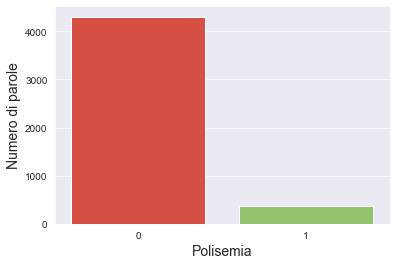

In [9]:
sns.set_style('darkgrid')
colors = ['#ef3b2c', '#91cf60']
#df['polysemy'].value_counts().plot(kind='bar', figsize=(6, 5), fontsize=10)
sns.countplot(x="polysemy", data=df, palette= colors)
#plt.title('Distribuzione delle parole polisemiche', fontsize=16)
plt.xlabel('Polisemia', fontsize=14)
plt.ylabel('Numero di parole', fontsize=14)
#plt.legend(["Non polisemiche", "Polisemiche"]).set_title('Polisemia')
plt.xticks(rotation=0)
plt.show()

### ANALISI DELLE SINGOLE VARIABILI E DELLE RELAZIONI COIN LA VARIABILE TARGET POLISEMIA

Osservando le variabili del datset abbiamo decisio di analizzare (utilizzando degli *histrogrammi*) la distruzione della polisemia rispetto alle seguenti  variabili: **lunghezza, familiarità, età di acquisizione, concretezza, dimensione semantica**


1.[Lunghezza/Polisemia + lunghezza](#pol_lunghezza) 

2.[Età di acquisizione/Polisemia + Età di acquisizione](#pol_aoa) 

3.[Familiarità /Polisemia + Età di acquisizione](#pol_fam) 

4.[Concretezza/Polisemia + Concretezza](#pol_concretezza) 

5.[Dimensione semantica/Polisemia +  Dimensione semantica](#pol_semsize) 

#### Lunghezza/Polisemia + lunghezza <a name="pol_lunghezza"></a>

Grafico sola lunghezza

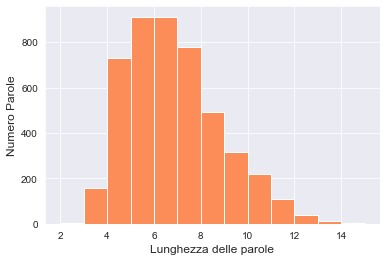

In [10]:
sns.set_style('darkgrid')
plt.hist(df['length'], bins = np.arange(2,16,1), edgecolor = 'w', color='#fc8d59')
#plt.title('Lunghezza', fontsize=15)
plt.xlabel('Lunghezza delle parole', fontsize=12)
plt.ylabel('Numero Parole', fontsize=12)
plt.show()

Polisemia rispetto alla lunghezza

In [11]:
df.groupby(['length'])["polysemy"].value_counts()

length  polysemy
2       0             2
3       0           120
        1            37
4       0           592
        1           140
5       0           794
        1           118
6       0           860
        1            50
7       0           754
        1            23
8       0           484
        1             8
9       0           314
        1             2
10      0           220
        1             1
11      0           108
12      0            39
13      0            11
14      0             4
16      0             1
Name: polysemy, dtype: int64

le parole polisemiche si distribuiscono in un range di lunghezza compresa tra 3 e 10

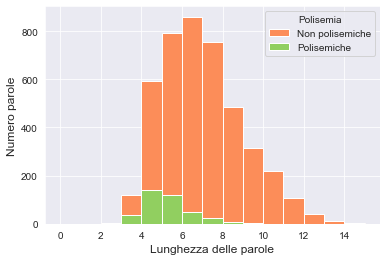

In [12]:
sns.set_style('darkgrid')
vals = list(df["polysemy"].unique())
colors = ['#fc8d59', '#91cf60']


for i, val in enumerate(vals):
    plt.hist(df[df['polysemy'] == val]['length'], bins = np.arange(0,16,1), edgecolor = 'w', color = colors[i])   
    plt.legend(["Non polisemiche", "Polisemiche"]).set_title('Polisemia')

#plt.title('Polisemia rispetto alla lunghezza', fontsize=15)
plt.xlabel('Lunghezza delle parole', fontsize=12)
plt.ylabel('Numero parole', fontsize=12)    

plt.show()

Lunghezza rispetto alla polisemia - dettaglio

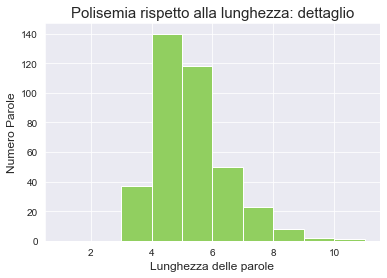

In [13]:
sns.set_style('darkgrid')
plt.hist(df[df['polysemy'] == 1]['length'],  bins = np.arange(1,12,1), edgecolor = 'w', color='#91cf60')
plt.title('Polisemia rispetto alla lunghezza: dettaglio', fontsize=15)
plt.xlabel('Lunghezza delle parole', fontsize=12)
plt.ylabel('Numero Parole', fontsize=12)  
plt.show()

#### Familiarità <a name="pol_fami"></a>

Grafico solo familiarità

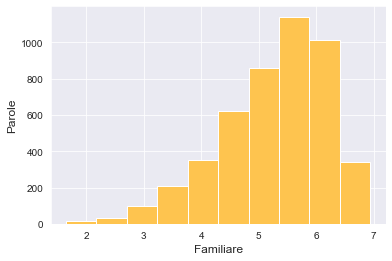

In [14]:
sns.set_style('darkgrid')
plt.hist(df['familiarity'],edgecolor = 'w', color='#fec44f')
#plt.title('Familiarità', fontsize=15)
plt.xlabel('Familiare', fontsize=12)
plt.ylabel('Parole', fontsize=12)
plt.show()

In [15]:
#plot_percentage(df, "familiarity")

Polisemia rispetto alla familiarità

In [16]:
df.groupby(['familiarity'])["polysemy"].value_counts()

familiarity  polysemy
1.647        0           1
1.735        0           2
1.794        0           1
1.938        0           1
2.029        0           1
                        ..
6.875        0           1
6.880        0           1
6.882        0           1
6.906        0           3
6.939        0           2
Name: polysemy, Length: 1258, dtype: int64

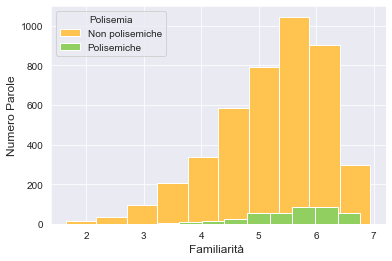

In [17]:
sns.set_style('darkgrid')
vals = list(df["polysemy"].unique())
colors = ['#fec44f', '#91cf60']

#loop della lista per ottenere una lista dei diversi gruppi
for i, val in enumerate(vals):
    plt.hist(df[df['polysemy'] == val]['familiarity'], edgecolor = 'w', color = colors[i])   
    plt.legend(["Non polisemiche", "Polisemiche"]).set_title('Polisemia')
#plt.title('Polisemia rispetto alla familiarità', fontsize=15)
plt.xlabel('Familiarità ', fontsize=12)
plt.ylabel('Numero Parole', fontsize=12)   
    
plt.show()

Polisemia rispetto alla familiarità: dettaglio

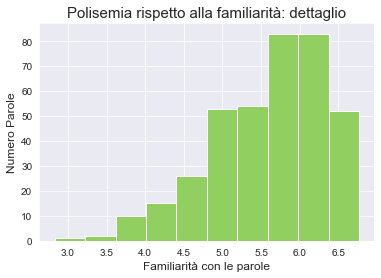

In [18]:
sns.set_style('darkgrid')
plt.hist(df[df['polysemy'] == 1]['familiarity'], edgecolor = 'w', color='#91cf60' )
plt.title('Polisemia rispetto alla familiarità: dettaglio', fontsize=15)
plt.xlabel('Familiarità con le parole', fontsize=12)
plt.ylabel('Numero Parole', fontsize=12)  
plt.show()

#### Età di acquisizione

Grafico sola età di acquisizione

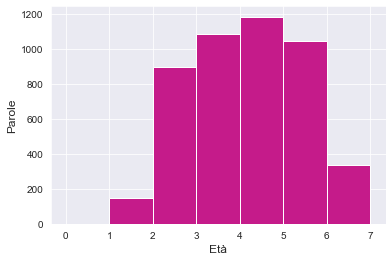

In [19]:
sns.set_style('darkgrid')
plt.hist(df['aoa'],edgecolor = 'w', color='#c51b8a', bins = np.arange(0,8,1))
#plt.title('Età di acquisizione', fontsize=15)
plt.xlabel('Età', fontsize=12)
plt.ylabel('Parole', fontsize=12)
plt.show()

In [20]:
#plot_percentage(df, 'aoa')

Polisemia rispetto all'età di acquisizione

In [21]:
df.groupby(['aoa'])["polysemy"].value_counts()

aoa    polysemy
1.219  0           1
1.265  0           1
1.333  0           1
1.371  1           1
1.382  0           1
                  ..
6.778  0           1
6.786  0           1
6.829  0           1
6.833  0           1
6.971  0           1
Name: polysemy, Length: 1181, dtype: int64

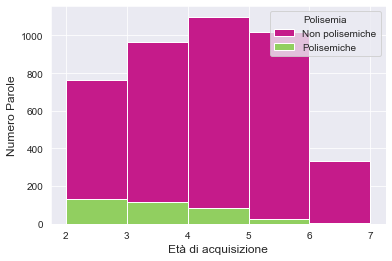

In [22]:
sns.set_style('darkgrid')
vals = list(df["polysemy"].unique())
colors = ['#c51b8a', '#91cf60']

#loop della lista per ottenere una lista dei diversi gruppi
for i, val in enumerate(vals):
    plt.hist(df[df['polysemy'] == val]['aoa'], edgecolor = 'w', color = colors[i], bins = np.arange(2,8,1))   
    plt.legend(["Non polisemiche", "Polisemiche"]).set_title('Polisemia')
#plt.title("Polisemia rispetto all'età di acquisizione", fontsize=15)
plt.xlabel('Età di acquisizione', fontsize=12)
plt.ylabel('Numero Parole', fontsize=12)   


    
plt.show()

Età di acquisizione rispetto alla polisemia - dettaglio

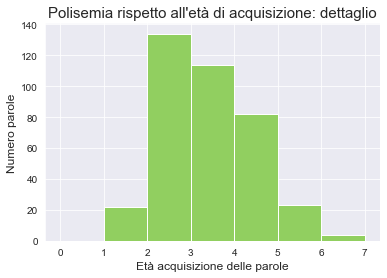

In [23]:
sns.set_style('darkgrid')
plt.hist(df[df['polysemy'] == 1]['aoa'], edgecolor = 'w', color='#91cf60', bins = np.arange(0,8,1) )
plt.title("Polisemia rispetto all'età di acquisizione: dettaglio", fontsize=15)
plt.xlabel('Età acquisizione delle parole', fontsize=12)
plt.ylabel('Numero parole', fontsize=12)  
plt.show()

#### Concretezza

Grafico solo concretezza

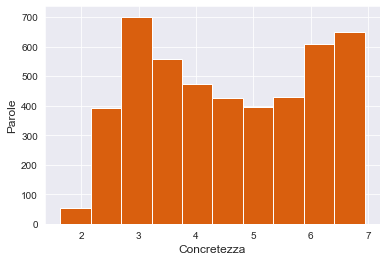

In [24]:
sns.set_style('darkgrid')
plt.hist(df['concreteness'],edgecolor = 'w', color='#d95f0e')
#plt.title('Concretezza delle parole', fontsize=15)
plt.xlabel('Concretezza', fontsize=12)
plt.ylabel('Parole', fontsize=12)
plt.show()

Polisemia rispetto alla concretezza

In [25]:
df.groupby(['concreteness'])["polysemy"].value_counts()

concreteness  polysemy
1.636         0           1
1.647         0           1
1.714         0           1
1.758         0           1
1.767         0           1
                         ..
6.906         0           1
6.909         0           1
6.912         0           1
6.931         0           1
6.938         1           1
Name: polysemy, Length: 1282, dtype: int64

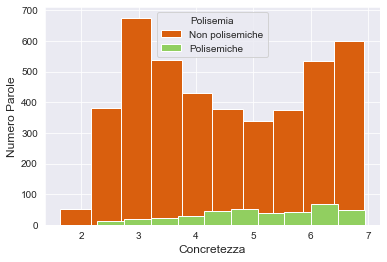

In [26]:
sns.set_style('darkgrid')

vals = list(df["polysemy"].unique())
colors = ['#d95f0e', '#91cf60']

#loop della lista per ottenere una lista dei diversi gruppi
for i, val in enumerate(vals):
    plt.hist(df[df['polysemy'] == val]['concreteness'], edgecolor = 'w', color = colors[i])   
    plt.legend(["Non polisemiche", "Polisemiche"]).set_title('Polisemia')
#plt.title('Polisemia rispetto alla concretezza', fontsize=15)
plt.xlabel('Concretezza', fontsize=12)
plt.ylabel('Numero Parole', fontsize=12)   
plt.show()

Polisemia rispetto alla concretezza: dettaglio

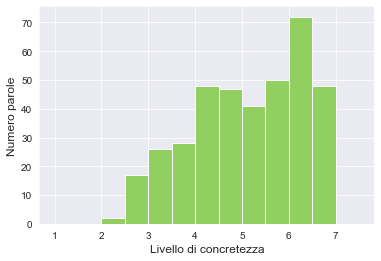

In [27]:
sns.set_style('darkgrid')
plt.hist(df[df['polysemy'] == 1]['concreteness'], edgecolor = 'w', color='#91cf60', bins = np.arange(1,8,0.5))
#plt.title("Polisemia rispetto alla concretezza: dettaglio", fontsize=15)
plt.xlabel('Livello di concretezza', fontsize=12)
plt.ylabel('Numero parole', fontsize=12)  
plt.show()

#### Dimensione semantica

Grafico solo dimensione semantica 

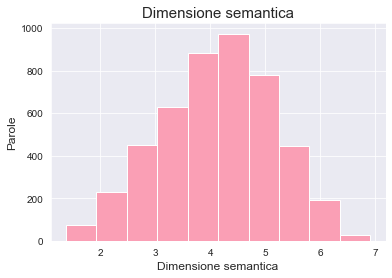

In [28]:
sns.set_style('darkgrid')
plt.hist(df['semsize'],edgecolor = 'w', color='#fa9fb5')
plt.title('Dimensione semantica', fontsize=15)
plt.xlabel('Dimensione semantica', fontsize=12)
plt.ylabel('Parole', fontsize=12)
plt.show()

Polisemia rispetto alla dimensione semantica

In [29]:
df.groupby(['semsize'])["polysemy"].value_counts()

semsize  polysemy
1.375    0           1
1.400    0           1
1.412    0           1
1.441    1           1
1.484    0           1
                    ..
6.667    0           1
6.688    0           1
6.742    0           1
6.788    0           1
6.912    0           1
Name: polysemy, Length: 1195, dtype: int64

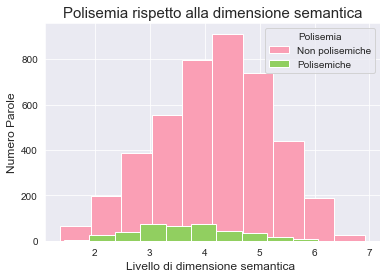

In [30]:

sns.set_style('darkgrid')
vals = list(df["polysemy"].unique())
colors = ['#fa9fb5', '#91cf60']

#loop della lista per ottenere una lista dei diversi gruppi
for i, val in enumerate(vals):
    plt.hist(df[df['polysemy'] == val]['semsize'], edgecolor = 'w', color = colors[i])   
    plt.legend(["Non polisemiche", "Polisemiche"]).set_title('Polisemia')
plt.title('Polisemia rispetto alla dimensione semantica', fontsize=15)
plt.xlabel('Livello di dimensione semantica ', fontsize=12)
plt.ylabel('Numero Parole', fontsize=12)   
    
plt.show()

Polisemia rispetto alla dimensione semantica: dettaglio

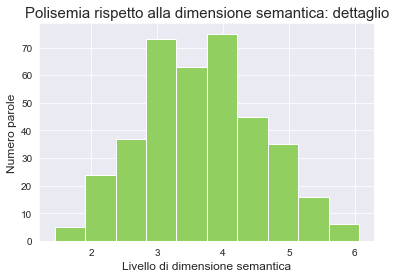

In [31]:

plt.hist(df[df['polysemy'] == 1]['semsize'], edgecolor = 'w', color='#91cf60')
plt.title("Polisemia rispetto alla dimensione semantica: dettaglio", fontsize=15)
plt.xlabel('Livello di dimensione semantica', fontsize=12)
plt.ylabel('Numero parole', fontsize=12)  
plt.show()

***

## Analisi della polisemia rispetto alla frequenza e alla frequenza 
Per analizzare queste due variabili in relazione alla var target dobbiamo prima *discretizzarle*

### Discretizzazione della **familiarità**
Utilizziamo il metodo **qcut()** di pandas discretizzando la var con i 4 qartili assegnando ad ognuno un valore (less, medium, high, very high)

In [32]:
df['disc_familiarity'] = pd.qcut(df['familiarity'],labels=["familiarità scarsa", "familiarità media", "familiarità alta","familiarità molto alta"], q=4)
df['disc_familiarity']

0           familiarità scarsa
1           familiarità scarsa
2            familiarità media
3           familiarità scarsa
4           familiarità scarsa
                 ...          
4677        familiarità scarsa
4678    familiarità molto alta
4679        familiarità scarsa
4680          familiarità alta
4681        familiarità scarsa
Name: disc_familiarity, Length: 4682, dtype: category
Categories (4, object): ['familiarità scarsa' < 'familiarità media' < 'familiarità alta' < 'familiarità molto alta']

In [33]:
df

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,disc_familiarity
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0,familiarità scarsa
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0,familiarità scarsa
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0,familiarità media
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0,familiarità scarsa
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0,familiarità scarsa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0,familiarità scarsa
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0,familiarità molto alta
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0,familiarità scarsa
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0,familiarità alta


In [34]:
df.groupby(['disc_familiarity']).median()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
disc_familiarity,,,,,,,,,,,,
familiarità scarsa,6.0,4.3000,4.9120,4.903,4.391,4.323,4.133,5.3870,4.097,4.353,0.0,1470060.0
familiarità media,6.0,4.5145,5.1450,5.030,4.463,4.677,5.107,4.4290,4.156,4.179,0.0,4439301.5
familiarità alta,6.0,4.6670,5.4000,5.182,4.273,4.647,5.710,3.8240,4.235,4.067,0.0,8887367.0
familiarità molto alta,6.0,4.8530,5.7845,5.394,4.857,5.319,6.258,2.8065,4.277,3.882,0.0,24855495.0


### Analisi della polisemia in base al livello di familiarità 

In [35]:
df.groupby(['disc_familiarity'])["polysemy"].value_counts()  #piu familiarita e piu polisemiche

disc_familiarity        polysemy
familiarità scarsa      0           1126
                        1             49
familiarità media       0           1088
                        1             88
familiarità alta        0           1056
                        1            105
familiarità molto alta  0           1033
                        1            137
Name: polysemy, dtype: int64

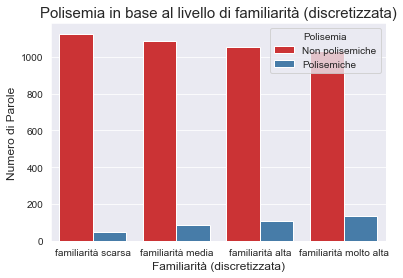

In [36]:
sns.countplot(x="disc_familiarity", hue='polysemy', data=df, palette = 'Set1') 
#df.groupby(['disc_familiarity'])["polysemy"].value_counts().plot(kind='bar', figsize=(6, 5), fontsize=10, )
plt.title('Polisemia in base al livello di familiarità (discretizzata)', fontsize=15)
plt.xlabel('Familiarità (discretizzata)', fontsize=12)
plt.ylabel('Numero di Parole', fontsize=12)  
plt.legend(["Non polisemiche", "Polisemiche"]).set_title('Polisemia')
plt.show()

In [37]:
def fillmedian(x):
    return x.fillna(x.median())

***

### Discretizzazione della **frequenza** (*web_corpus freq*)

In [38]:
df["web_corpus_freq"]=df["web_corpus_freq"].fillna(df["web_corpus_freq"].median())

In [39]:
df['disc_frequency'] = pd.qcut(df['web_corpus_freq'],labels=["scarsa", "media", "alta ","molto alta"], q=4)
df['disc_frequency']

0           scarsa
1            media
2           scarsa
3           scarsa
4           scarsa
           ...    
4677         media
4678    molto alta
4679        scarsa
4680         alta 
4681        scarsa
Name: disc_frequency, Length: 4682, dtype: category
Categories (4, object): ['scarsa' < 'media' < 'alta ' < 'molto alta']

In [40]:
df

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,disc_familiarity,disc_frequency
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0,familiarità scarsa,scarsa
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0,familiarità scarsa,media
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0,familiarità media,scarsa
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0,familiarità scarsa,scarsa
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0,familiarità scarsa,scarsa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0,familiarità scarsa,media
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0,familiarità molto alta,molto alta
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0,familiarità scarsa,scarsa
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0,familiarità alta,alta


In [41]:
df.groupby("disc_frequency").count()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,disc_familiarity
disc_frequency,,,,,,,,,,,,,,
scarsa,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171
media,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177
alta,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163
molto alta,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171


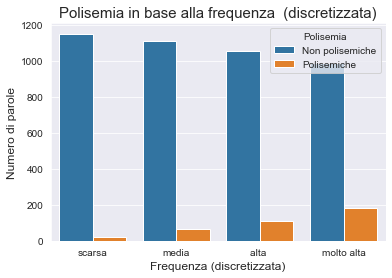

In [42]:
sns.countplot(x="disc_frequency", hue='polysemy', data=df)
#df.groupby(['disc_frequency'])["polysemy"].value_counts().plot(kind='bar', figsize=(6, 5), fontsize=10, )
plt.title('Polisemia in base alla frequenza  (discretizzata)', fontsize=15)
plt.xlabel('Frequenza (discretizzata)', fontsize=12)
plt.ylabel('Numero di parole', fontsize=12)  
plt.legend(["Non polisemiche", "Polisemiche"]).set_title('Polisemia')
plt.show()

***

## NLTK - Estrazione POS
- Estraggo le POS del dataset utilizzando il POS tag di NLTK
- Creo una nuova colonna con le Pos

In [43]:
from nltk import *
download('averaged_perceptron_tagger')
download('universal_tagset')

POS = nltk.pos_tag(list(df['word']), tagset='universal')
POS_list = []

for word, tag in POS:
    POS_list.append(tag)
POS_list


POS_col = 'pos' #aggiungo la colonna POS al DS
df[POS_col] = POS_list


#for el in df['pos_tagging'].unique():
    #print(el,': ', POS_list.count(el))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aliis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\aliis\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [44]:
df

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,disc_familiarity,disc_frequency,pos
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0,familiarità scarsa,scarsa,NOUN
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0,familiarità scarsa,media,NOUN
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0,familiarità media,scarsa,NOUN
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0,familiarità scarsa,scarsa,NOUN
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0,familiarità scarsa,scarsa,NOUN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0,familiarità scarsa,media,NOUN
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0,familiarità molto alta,molto alta,NUM
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0,familiarità scarsa,scarsa,ADJ
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0,familiarità alta,alta,NOUN


In [45]:
tot_pos = df['pos'].value_counts()
tot_pos

NOUN    2945
ADJ     1082
VERB     476
ADV       98
ADP       49
X         12
DET        6
NUM        5
PRON       5
CONJ       3
PRT        1
Name: pos, dtype: int64

Le POS più frequenti sono soprattutto Nomi e Aggettivi seguiti subito dopo dai verbi, apposizioni e avverbi

Creo quindi un nuovo dataset con le pos più frequenti all'interno del dataset

In [46]:
df_pos_freq = df[(df["pos"] == 'NOUN') | (df["pos"] == 'ADJ') | (df["pos"] == 'VERB')| (df["pos"] == 'ADP')| (df["pos"] == 'ADV')]

In [47]:
df_pos_freq

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,disc_familiarity,disc_frequency,pos
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0,familiarità scarsa,scarsa,NOUN
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0,familiarità scarsa,media,NOUN
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0,familiarità media,scarsa,NOUN
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0,familiarità scarsa,scarsa,NOUN
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0,familiarità scarsa,scarsa,NOUN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676,zephyr,6,4.667,5.200,4.643,3.813,3.357,1.647,6.778,3.929,4.467,0,1334891.0,familiarità scarsa,scarsa,NOUN
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0,familiarità scarsa,media,NOUN
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0,familiarità scarsa,scarsa,ADJ
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0,familiarità alta,alta,NOUN


Barplot che conta tutte le pos più frequenti nel ds

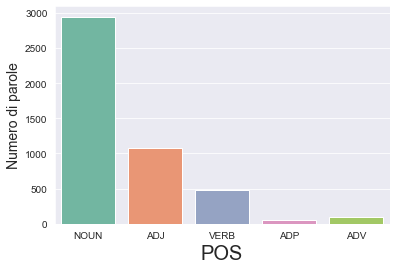

In [48]:
sns.set_style('darkgrid')
sns.countplot(x="pos", data=df_pos_freq, palette= 'Set2')
#plt.title('Distribuzione delle part of speech nel dataset', fontsize=16)
plt.xlabel('POS', fontsize=20)
plt.ylabel('Numero di parole', fontsize=14)
plt.xticks(rotation=0)
plt.show()

Analizzo le pos in relazione alla **polisemia**: *quante di queste pos sono polisemiche?*

Tutte le pos in base alla polisemia

In [49]:
df_pos_polysemy = df.groupby(['pos'])["polysemy"].value_counts()
df_pos_polysemy

pos   polysemy
ADJ   0           1024
      1             58
ADP   0             45
      1              4
ADV   0             92
      1              6
CONJ  0              3
DET   0              6
NOUN  0           2680
      1            265
NUM   0              5
PRON  0              5
PRT   1              1
VERB  0            431
      1             45
X     0             12
Name: polysemy, dtype: int64

Solo le pos più frequenti in base alla polisemia

In [50]:
df_pos_polysemy = df_pos_freq.groupby(['pos'])["polysemy"].value_counts()
df_pos_polysemy

pos   polysemy
ADJ   0           1024
      1             58
ADP   0             45
      1              4
ADV   0             92
      1              6
NOUN  0           2680
      1            265
VERB  0            431
      1             45
Name: polysemy, dtype: int64

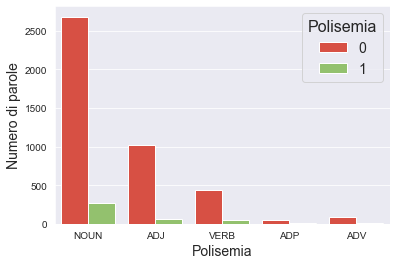

In [51]:
sns.set_style('darkgrid')
colors = ['#ef3b2c', '#91cf60']
#df['polysemy'].value_counts().plot(kind='bar', figsize=(6, 5), fontsize=10)
sns.countplot(x="pos", hue = 'polysemy', data=df_pos_freq, palette= colors)
#plt.title('Distribuzione delle parole polisemiche', fontsize=16)
plt.xlabel('Polisemia', fontsize=14)
plt.ylabel('Numero di parole', fontsize=14)
plt.legend(["Non polisemiche", "Polisemiche"]).set_title('Polisemia')
plt.legend(title = 'Polisemia', title_fontsize = 16, fontsize = 14)
plt.xticks(rotation=0)
plt.show()

Per poter fare altri confronti con le POS più frequenti nel dataset (nomi, aggettivi, verbi, avverbi e apposizioni), categorizzo alcune variabili del dataset:
- **Lunghezza**
- **Familiarità**
- **Frequenza**

In [52]:

df_pos_freq['length_cat'] = pd.qcut(df_pos_freq['length'], 4, labels=["corte", "medie", "lunghe", "molto lunghe"])
df_pos_freq['familiarity_cat'] = pd.qcut(df_pos_freq['familiarity'], 4, labels=["molto poco familiare", "poco familiare", "familiare", "molto familiare"])
df_pos_freq['frequency_cat'] = pd.qcut(df_pos_freq['web_corpus_freq'], 4, labels=["poco frequente", "medio frequente", "frequente", "molto frequente"])
#df_pos_freq['arousal_cat'] = pd.qcut(df_pos_freq['arousal'], 4, labels=["molto calmante", "calmante", "eccitante", "molto eccitante"])

C:\Users\aliis\AppData\Local\Temp/ipykernel_2988/3324655610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos_freq['length_cat'] = pd.qcut(df_pos_freq['length'], 4, labels=["corte", "medie", "lunghe", "molto lunghe"])
C:\Users\aliis\AppData\Local\Temp/ipykernel_2988/3324655610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos_freq['familiarity_cat'] = pd.qcut(df_pos_freq['familiarity'], 4, labels=["molto poco familiare", "poco familiare", "familiare", "molto familiare"])
C:\Users\aliis\App

In [53]:
df_pos_freq

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,disc_familiarity,disc_frequency,pos,length_cat,familiarity_cat,frequency_cat
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0,familiarità scarsa,scarsa,NOUN,lunghe,molto poco familiare,poco frequente
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0,familiarità scarsa,media,NOUN,corte,molto poco familiare,medio frequente
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0,familiarità media,scarsa,NOUN,molto lunghe,poco familiare,poco frequente
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0,familiarità scarsa,scarsa,NOUN,lunghe,molto poco familiare,poco frequente
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0,familiarità scarsa,scarsa,NOUN,molto lunghe,molto poco familiare,poco frequente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676,zephyr,6,4.667,5.200,4.643,3.813,3.357,1.647,6.778,3.929,4.467,0,1334891.0,familiarità scarsa,scarsa,NOUN,medie,molto poco familiare,poco frequente
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0,familiarità scarsa,media,NOUN,lunghe,molto poco familiare,medio frequente
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0,familiarità scarsa,scarsa,ADJ,corte,molto poco familiare,poco frequente
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0,familiarità alta,alta,NOUN,corte,familiare,frequente


### POS in relazione alla lunghezza
- raggruppo le pos in base alla lunghezza
- le rappresento in un grafico a barre

In [54]:
df_pos_freq.groupby(df_pos_freq['pos'])["length"].value_counts()

pos   length
ADJ   5         218
      6         213
      7         188
      4         133
      8         120
      9          85
      10         57
      11         28
      3          26
      12         12
      13          1
      16          1
ADP   5          13
      6          11
      4           9
      7           7
      9           4
      8           3
      3           1
      10          1
ADV   5          26
      6          22
      4          16
      7          13
      8          11
      9           4
      3           2
      10          2
      2           1
      12          1
NOUN  6         573
      5         571
      4         485
      7         471
      8         294
      9         189
      10        142
      3         110
      11         70
      12         26
      13          9
      14          4
      2           1
VERB  7          91
      6          88
      4          81
      5          77
      8          63
      9          34
      1

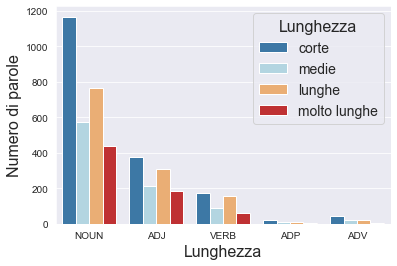

In [55]:
sns.set_style('darkgrid')
color = ['#2c7bb6', '#abd9e9', '#fdae61', '#d7191c']
#df['polysemy'].value_counts().plot(kind='bar', figsize=(6, 5), fontsize=10)
sns.countplot(x="pos", hue = 'length_cat', data=df_pos_freq, palette = color)
#plt.title('Distribuzione della lunghezza delle pos', fontsize=18)
plt.xlabel('Lunghezza', fontsize=16)
plt.ylabel('Numero di parole', fontsize=16)
plt.legend(["2", "Polisemiche"]).set_title('Polisemia')
plt.legend(title = 'Lunghezza', title_fontsize = 16, fontsize = 14)
plt.show()

### Pos in relazione alla *familiarità*
- raggruppo le pos in base alla familarità (categorizzata)
- le rappresento in un grafico a barre

In [56]:
df_pos_freq.groupby(df_pos_freq['pos'])["familiarity_cat"].value_counts()

pos                       
ADJ   molto poco familiare    278
      familiare               277
      molto familiare         275
      poco familiare          252
ADP   familiare                14
      molto poco familiare     13
      molto familiare          12
      poco familiare           10
ADV   molto familiare          28
      molto poco familiare     26
      familiare                23
      poco familiare           21
NOUN  poco familiare          762
      molto poco familiare    744
      familiare               730
      molto familiare         709
VERB  molto familiare         134
      poco familiare          123
      familiare               114
      molto poco familiare    105
Name: familiarity_cat, dtype: int64

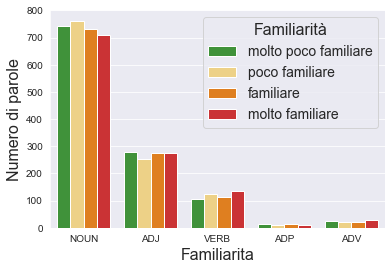

In [57]:
sns.set_style('darkgrid')
color = ['#33a02c', '#fed976','#ff7f00','#e31a1c']
#df['polysemy'].value_counts().plot(kind='bar', figsize=(6, 5), fontsize=10)
sns.countplot(x="pos", hue = 'familiarity_cat', data=df_pos_freq, palette = color)
#plt.title('Distribuzione del livello di familiarità delle POS', fontsize=18)
plt.xlabel('Familiarita', fontsize=16)
plt.ylabel('Numero di parole', fontsize=16)
plt.legend(title = 'Familiarità', title_fontsize = 16, fontsize = 14)
plt.show()

### POS in relazione alla *frequenza*
- raggruppo le pos in base alla frequenza (categorizzata)
- le rappresento in un grafico a barre

In [58]:
df_pos_freq.groupby(df_pos_freq['pos'])["frequency_cat"].value_counts()

pos                  
ADJ   poco frequente     306
      medio frequente    274
      frequente          254
      molto frequente    248
ADP   medio frequente     15
      poco frequente      14
      molto frequente     12
      frequente            8
ADV   frequente           27
      medio frequente     26
      poco frequente      25
      molto frequente     20
NOUN  molto frequente    771
      medio frequente    752
      frequente          746
      poco frequente     676
VERB  poco frequente     142
      frequente          121
      molto frequente    112
      medio frequente    101
Name: frequency_cat, dtype: int64

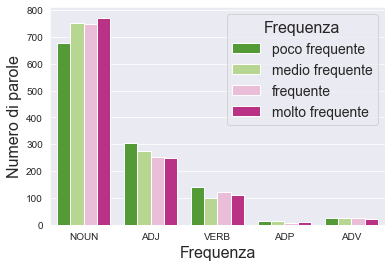

In [59]:
sns.set_style('darkgrid')
color = ['#4dac26', '#b8e186', '#f1b6da', '#d01c8b']
#df['polysemy'].value_counts().plot(kind='bar', figsize=(6, 5), fontsize=10)
sns.countplot(x="pos", hue = 'frequency_cat', data=df_pos_freq, palette = color)
#plt.title('Distribuzione della frequenza delle POS', fontsize=18)
plt.xlabel('Frequenza', fontsize=16)
plt.ylabel('Numero di parole', fontsize=16)
plt.legend(title = 'Frequenza', title_fontsize = 16, fontsize = 14)

plt.show()